In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import DBSCAN, k_means
from sklearn.neighbors import KDTree
from sklearn import datasets
from sklearn import metrics

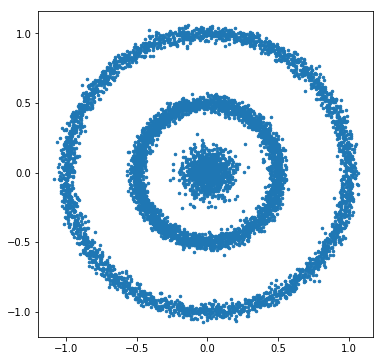

In [3]:
x1, y1 = datasets.make_circles(n_samples=6000, factor=0.5, noise=0.03)
x2, y2 = datasets.make_blobs(n_samples=1000, centers=[[0, 0]], cluster_std=[0.085])
X = np.vstack((x1, x2))
plt.figure(figsize=(6, 6))
plt.plot(X[:,0],X[:,1],'.', markersize=5)

In [6]:
def dist(a, b):
    m = a.shape[0]
    n = b.shape[0]
    res = np.zeros((m, n))
    for i in range(m):
        res[i] = np.sqrt(np.sum((a[i] - b) ** 2, axis=1))
    return res

In [32]:
def dbscan(data, eps, minpts):
    dis = dist(data, data)  # 求两两之间距离
    n = data.shape[0]  # 样本数
    k = 0  # 类编号
    visit = np.zeros(n)  # 是否被访问过
    res = np.zeros(n).astype(np.int)  # 聚类结果
    random_id = np.random.permutation(n)  # 随机排列
    for s in random_id:
        if visit[s] == 0:
            visit[s] = 1
            neps = list(np.where(dis[s] <= eps)[0])  # 找到 eps 范围邻域内所有点(包括了自己)
            if len(neps)-1 < minpts:  # 数量不足 minpts 暂时设为噪声点
                res[s] = -1
            else:  
                k += 1
                res[s] = k  # 数量达到 minpts 归为 k 类
                while len(neps) > 0:
                    j = np.random.choice(neps)
                    neps.remove(j)
                    if res[j] == -1:  # 如果之前被标为噪声点，则归为该类, 也可以归为边界点
                        res[j] = k
                    if visit[j] == 0:  # 没有被访问过
                        visit[j] = 1
                        j_neps = list(np.where(dis[j] <= eps)[0])  # 找邻域
                        if len(j_neps)-1 < minpts:
                            res[j] = k  # 非核心点，可归为该类, 也可以归为边界点
                        else:
                            res[j] = k  # 核心点，加入集合
                            neps = list(set(neps + j_neps))
    return res, k

In [28]:
def dbscan2(data, eps, minpts):
    kdtree = KDTree(data)
    n = data.shape[0]  # 样本数
    k = 0  # 类编号
    visit = np.zeros(n)  # 是否被访问过
    res = np.zeros(n)  # 聚类结果
    random_id = np.random.permutation(n)  # 随机排列
    for s in random_id:
        if visit[s] == 0:
            visit[s] = 1
            neps = list(kdtree.query_radius(data[s].reshape(1, -1), eps)[0])  # 找到 eps 范围邻域内所有点(包括了自己)
            if len(neps)-1 < minpts:  # 数量不足 minpts 暂时设为噪声点
                res[s] = -1
            else:  
                k += 1
                res[s] = k  # 数量达到 minpts 归为 k 类
                while len(neps) > 0:
                    j = random.choice(neps)
                    neps.remove(j)
                    if res[j] == -1:  # 如果之前被标为噪声点，则归为该类
                        res[j] = k
                    if visit[j] == 0:  # 没有被访问过
                        visit[j] = 1
                        j_neps = list(kdtree.query_radius(data[j].reshape(1, -1), eps)[0])  # 找邻域
                        if len(j_neps)-1 < minpts:
                            res[j] = k  # 非核心点，可归为该类, 也可以归为边界点
                        else:
                            res[j] = k  # 核心点，加入集合
                            neps = list(set(neps + j_neps))
    return res, k

In [7]:
d = dist(X, X)

In [33]:
res, k = dbscan(X, 0.05, 8)

In [29]:
%%time
res, k = dbscan2(X, 0.05, 8)

Wall time: 3.96 s


In [34]:
db = DBSCAN(eps=0.05, min_samples=8)
db.fit(X)
label = db.labels_

In [15]:
np.max(res)

3

In [27]:
kdtree = KDTree(X)
kdtree.query_radius(np.expand_dims(X[2, :], 0), 0.05)[0]

array([1082, 1321, 4325,  717, 3484, 5720, 3817, 2772, 2246, 2312, 2849,
       3386, 4495,    2, 1051, 1546,  563, 2382, 4383, 2906, 3186, 1644,
       4354], dtype=int64)

In [25]:
np.expand_dims(X[0, :], 0)

array([[ 0.1741371 , -0.97242148]])

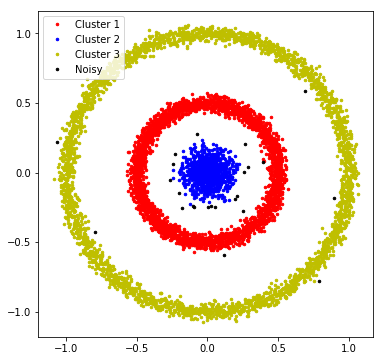

In [43]:
plt.figure(figsize=(6, 6))
plt.plot(X[res==1, 0],X[res==1,1],'r.',markersize=5, label='Cluster 1')
plt.plot(X[res==2, 0],X[res==2,1],'b.', markersize=5, label='Cluster 2')
plt.plot(X[res==3, 0],X[res==3,1],'y.',markersize=5, label='Cluster 3')
# plt.plot(X[res==4, 0],X[res==4,1],'g.',markersize=5, label='Cluster 4')
# plt.plot(X[res==0, 0],X[res==0,1],'m.',markersize=5, label='Cluster 5')
# plt.plot(X[res==5, 0],X[res==5,1],'c.',markersize=5, label='Cluster 6')
# plt.plot(X[res==0, 0],X[res==0,1],'m.',markersize=5, label='Border')
plt.plot(X[res==-1, 0],X[res==-1,1],'k.', markersize=5, label='Noisy')
plt.legend(loc='upper left')

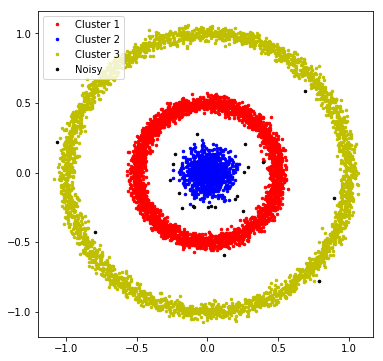

In [46]:
plt.figure(figsize=(6, 6))
plt.plot(X[label==1, 0],X[label==1,1],'r.',markersize=5, label='Cluster 1')
plt.plot(X[label==2, 0],X[label==2,1],'b.', markersize=5, label='Cluster 2')
# plt.plot(X[label==3, 0],X[label==3,1],'y.',markersize=5, label='Cluster 3')
# plt.plot(X[res==4, 0],X[res==4,1],'g.',markersize=5, label='Cluster 4')
plt.plot(X[label==0, 0],X[label==0,1],'y.',markersize=5, label='Cluster 3')
# plt.plot(X[res==5, 0],X[res==5,1],'c.',markersize=5, label='Cluster 6')
# plt.plot(X[res==0, 0],X[res==0,1],'m.',markersize=5, label='Border')
plt.plot(X[res==-1, 0],X[res==-1,1],'k.', markersize=5, label='Noisy')
plt.legend(loc='upper left')

In [35]:
def CDindex(y_pred, y_true):
    n = len(y_pred)
    aa = 0
    ab = 0
    for i in range(n):
        for j in range(i, n):
            if y_pred[i] == y_pred[j] and y_true[i]==y_true[j]:
                aa += 1
            elif y_pred[i] == y_pred[j] or y_true[i]==y_true[j]:
                ab += 1
    return 2*aa / (2*aa + ab)

In [36]:
CDindex(res, label)

0.9998405775803481

In [41]:
np.where(res == -1)

(array([ 790,  923, 2597, 3420, 3603, 4296, 5491, 5771, 6010, 6099, 6217,
        6220, 6263, 6405, 6465, 6466, 6484, 6552, 6579, 6623, 6732, 6751,
        6962, 6964], dtype=int64),)

In [42]:
np.where(label==-1)

(array([ 790,  923, 2597, 3603, 4296, 5491, 5771, 6010, 6099, 6217, 6220,
        6263, 6405, 6465, 6466, 6484, 6552, 6579, 6623, 6732, 6751, 6962,
        6964], dtype=int64),)